In [415]:
import pandas as pd
import numpy as np

In [416]:
train=pd.read_csv("C:\\Users\\YashnaBehera\\Downloads\\train_v9rqX0R.csv")
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [417]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [418]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [419]:
item_type_mode = train.pivot_table(values='Item_Weight', columns='Item_Type', aggfunc=(lambda x: x.median()))
#item_type_mode
miss_bool = train['Item_Weight'].isnull()
train.loc[miss_bool, 'Item_Weight'] = train.loc[miss_bool, 'Item_Type'].apply(lambda x:item_type_mode[x])

In [420]:
Outlet_Type_mode = train.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
#Outlet_Type_mode
miss_bool = train['Outlet_Size'].isnull()
train.loc[miss_bool, 'Outlet_Size'] = train.loc[miss_bool, 'Outlet_Type'].apply(lambda x:Outlet_Type_mode[x])

In [421]:
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [422]:
def clean_col(col):
    if(col=="low fat" or col=="LF" or col=="Low Fat"):
        return 1
    elif(col=="reg" or col=="Regular"):
        return 2
    elif col=="Small":
        return 1
    elif col=="Medium":
        return 2
    elif col=="High":
        return 3
    else:
        return col

In [423]:
train['Item_Fat_Content']=train['Item_Fat_Content'].apply(clean_col)
train['Item_Fat_Content'].value_counts()

1    5517
2    3006
Name: Item_Fat_Content, dtype: int64

In [424]:
train['Outlet_Size']=train['Outlet_Size'].apply(clean_col)
train['Outlet_Size'].value_counts()

1    4798
2    2793
3     932
Name: Outlet_Size, dtype: int64

In [425]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,1,0.016047,Dairy,249.8092,OUT049,1999,2,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,2,0.019278,Soft Drinks,48.2692,OUT018,2009,2,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,1,0.016760,Meat,141.6180,OUT049,1999,2,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,2,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,1,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,1,0.000000,Household,53.8614,OUT013,1987,3,Tier 3,Supermarket Type1,994.7052


In [426]:
# a=pd.get_dummies(train,columns=['Item_Type', 'Outlet_Location_Type',
#                                'Outlet_Type','Outlet_Identifier','Outlet_Establishment_Year'],drop_first=True)
# a.head()

from sklearn.preprocessing import LabelEncoder
train.loc[:,['Item_Type','Outlet_Location_Type','Outlet_Type','Outlet_Identifier',
            'Outlet_Establishment_Year']] = train.loc[:,['Item_Type','Outlet_Location_Type','Outlet_Type','Outlet_Identifier','Outlet_Establishment_Year']].apply(LabelEncoder().fit_transform) 
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,1,0.016047,4,249.8092,9,4,2,0,1,3735.1380
1,DRC01,5.92,2,0.019278,14,48.2692,3,8,2,2,2,443.4228
2,FDN15,17.50,1,0.016760,10,141.6180,9,4,2,0,1,2097.2700
3,FDX07,19.20,2,0.000000,6,182.0950,0,3,1,2,0,732.3800
4,NCD19,8.93,1,0.000000,9,53.8614,1,1,3,2,1,994.7052


In [427]:
x = train.drop(['Item_Outlet_Sales','Item_Identifier'], axis=1)
y = train['Item_Outlet_Sales']

# x = a.drop(['Item_Outlet_Sales','Item_Identifier'], axis=1)
# y = a['Item_Outlet_Sales']
x.shape, y.shape

((8523, 10), (8523,))

In [428]:
# Importing the train test split function
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 54)

In [429]:
## Importing the MinMax Scaler
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()

train_x = minmax.fit_transform(train_x)
test_x = minmax.transform(test_x)

In [430]:
#importing Linear Regression and metric mean square error
from sklearn.tree import DecisionTreeRegressor 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import r2_score

In [431]:
# Creating instance of Linear Regresssion
dt = DecisionTreeRegressor(criterion='mae', 
        max_depth=32, 
        min_samples_split=52, 
        min_samples_leaf=22)

# Fitting the model
dt.fit(train_x, train_y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mae', max_depth=32,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=22, min_samples_split=52,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [432]:
# Predicting over the Train Set and calculating error
from math import sqrt
train_predict = dt.predict(train_x)
k =sqrt(mean_absolute_error(train_predict, train_y))
#b=mae(train_predict, train_y)
print('Training Root Mean Absolute Error', k )

Training Root Mean Absolute Error 26.18037507284691


C:\Users\YashnaBehera\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\YashnaBehera\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


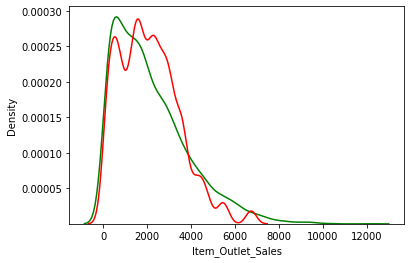

In [485]:
import seaborn as sns
sns.distplot(train_y, hist=False, color="g", label="Actual Values")
sns.distplot(train_predict, hist=False, color="r", label="Predicted Values" )

In [480]:
test = pd.read_csv("C:\\Users\\YashnaBehera\\Downloads\\test_AbJTz2l.csv")
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [466]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [467]:
item_type_mode = test.pivot_table(values='Item_Weight', columns='Item_Type', aggfunc=(lambda x: x.median()))
#item_type_mode
miss_bool = test['Item_Weight'].isnull()
test.loc[miss_bool, 'Item_Weight'] = test.loc[miss_bool, 'Item_Type'].apply(lambda x:item_type_mode[x])

In [468]:
Outlet_Type_mode = test.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
#Outlet_Type_mode
miss_bool = train['Outlet_Size'].isnull()
test.loc[miss_bool, 'Outlet_Size'] = test.loc[miss_bool, 'Outlet_Type'].apply(lambda x:Outlet_Type_mode[x])

In [469]:
test['Item_Fat_Content']=train['Item_Fat_Content'].apply(clean_col)
test['Item_Fat_Content'].value_counts()

1    3677
2    2004
Name: Item_Fat_Content, dtype: int64

In [470]:
test['Outlet_Size']=train['Outlet_Size'].apply(clean_col)
test['Outlet_Size'].value_counts()

1    3219
2    1832
3     630
Name: Outlet_Size, dtype: int64

In [471]:
test.loc[:,['Item_Type','Outlet_Location_Type','Outlet_Type','Outlet_Identifier',
            'Outlet_Establishment_Year']] = train.loc[:,['Item_Type','Outlet_Location_Type','Outlet_Type','Outlet_Identifier','Outlet_Establishment_Year']].apply(LabelEncoder().fit_transform) 
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,1,0.007565,4,107.8622,9,4,2,0,1
1,FDW14,8.300,2,0.038428,14,87.3198,3,8,2,2,2
2,NCN55,14.600,1,0.099575,10,241.7538,9,4,2,0,1
3,FDQ58,7.315,2,0.015388,6,155.0340,0,3,1,2,0
4,FDY38,12.800,1,0.118599,9,234.2300,1,1,3,2,1


In [472]:
 a=test.drop(['Item_Identifier'], axis=1)

In [473]:
## Importing the MinMax Scaler
test_x = minmax.transform(a)

In [474]:
test_1_predict = dt.predict(test_x)
a["Item_Outlet_Sales"] = test_1_predict 
a.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,20.750,1,0.007565,4,107.8622,9,4,2,0,1,1270.3464
1,8.300,2,0.038428,14,87.3198,3,8,2,2,2,1470.0864
2,14.600,1,0.099575,10,241.7538,9,4,2,0,1,2303.6680
3,7.315,2,0.015388,6,155.0340,0,3,1,2,0,468.3903
4,12.800,1,0.118599,9,234.2300,1,1,3,2,1,3566.3577


In [475]:
data1=a["Item_Outlet_Sales"]
data1

0       1270.3464
1       1470.0864
2       2303.6680
3        468.3903
4       3566.3577
          ...    
5676    1771.0280
5677    2652.5472
5678    1540.6612
5679    5609.3650
5680    1158.4920
Name: Item_Outlet_Sales, Length: 5681, dtype: float64

In [481]:
data2=test[["Item_Identifier","Outlet_Identifier"]]

In [482]:
data_dt=pd.concat([data2,data1],axis = 1)
data_dt.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1270.3464
1,FDW14,OUT017,1470.0864
2,NCN55,OUT010,2303.6680
3,FDQ58,OUT017,468.3903
4,FDY38,OUT027,3566.3577


In [483]:
data_dt.to_csv('data_dt.csv')